# Import Data & Load Data





In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import category_encoders as ce
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
customers      = pd.read_csv('/content/olist_customers_dataset.csv')
geolocation    = pd.read_csv('/content/olist_geolocation_dataset.csv')
order_items    = pd.read_csv('/content/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
reviews        = pd.read_csv('/content/olist_order_reviews_dataset.csv')
orders         = pd.read_csv('/content/olist_orders_dataset.csv')
products       = pd.read_csv('/content/olist_products_dataset.csv')
sellers        = pd.read_csv('/content/olist_sellers_dataset.csv')
category_name  = pd.read_csv('/content/product_category_name_translation.csv')

#1. Orders





In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


I want to see if there is any empty data, as this will affect the feature engineering that I will do.

In [ ]:
orders_total = orders.isnull().sum()
orders_total [:]

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#**Handling Missing Vallues** 
Now I want to remove rows of data that have at least one missing value.

In [ ]:
print(orders.dropna())
orders_clear= orders.dropna() 

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

Now I want to check whether the missing values in the data still exist or not.



In [ ]:
orders_clear_total = orders_clear.isnull().sum()
orders_clear_total [:]

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Yeayy, no more missing values.


#🕐 Here I want to find the time difference between order time and payment approval

In [ ]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['Time_purchase_until_approved'] = orders['order_approved_at'] - orders['order_purchase_timestamp']
orders[['order_purchase_timestamp', 'order_approved_at','Time_purchase_until_approved']]

,order_purchase_timestamp,order_approved_at,Time_purchase_until_approved
0,2017-10-02 10:56:33,2017-10-02 11:07:15,0 days 00:10:42
1,2018-07-24 20:41:37,2018-07-26 03:24:27,1 days 06:42:50
2,2018-08-08 08:38:49,2018-08-08 08:55:23,0 days 00:16:34
3,2017-11-18 19:28:06,2017-11-18 19:45:59,0 days 00:17:53
4,2018-02-13 21:18:39,2018-02-13 22:20:29,0 days 01:01:50
...,...,...,...
99436,2017-03-09 09:54:05,2017-03-09 09:54:05,0 days 00:00:00
99437,2018-02-06 12:58:58,2018-02-06 13:10:37,0 days 00:11:39
99438,2017-08-27 14:46:43,2017-08-27 15:04:16,0 days 00:17:33
99439,2018-01-08 21:28:27,2018-01-08 21:36:21,0 days 00:07:54


In [ ]:
orders['Time_purchase_until_approved'].describe()

count                        99281
mean     0 days 10:25:08.739486910
std      1 days 02:02:16.813098347
min                0 days 00:00:00
25%                0 days 00:12:54
50%                0 days 00:20:36
75%                0 days 14:34:51
max              187 days 21:10:50
Name: Time_purchase_until_approved, dtype: object

With the data above I can find out the minimum, maximum, and average time from booking to payment approval. This can be an evaluation material for stakeholders to improve their performance, perhaps in terms of payment options, or other aspects so that the booking time until payment approval is even faster.

#  🕐 Here I want to find the time difference between payment approval time and order posting time


In [ ]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['approved_until_delivered_date'] = orders['order_delivered_carrier_date'] - orders['order_approved_at']
orders[['order_approved_at', 'order_delivered_carrier_date','approved_until_delivered_date']]

,order_approved_at,order_delivered_carrier_date,approved_until_delivered_date
0,2017-10-02 11:07:15,2017-10-04 19:55:00,2 days 08:47:45
1,2018-07-26 03:24:27,2018-07-26 14:31:00,0 days 11:06:33
2,2018-08-08 08:55:23,2018-08-08 13:50:00,0 days 04:54:37
3,2017-11-18 19:45:59,2017-11-22 13:39:59,3 days 17:54:00
4,2018-02-13 22:20:29,2018-02-14 19:46:34,0 days 21:26:05
...,...,...,...
99436,2017-03-09 09:54:05,2017-03-10 11:18:03,1 days 01:23:58
99437,2018-02-06 13:10:37,2018-02-07 23:22:42,1 days 10:12:05
99438,2017-08-27 15:04:16,2017-08-28 20:52:26,1 days 05:48:10
99439,2018-01-08 21:36:21,2018-01-12 15:35:03,3 days 17:58:42


In [ ]:
orders['approved_until_delivered_date'].describe()

count                        97644
mean     2 days 19:19:15.298850927
std      3 days 13:11:10.497083683
min            -172 days +18:44:38
25%                0 days 21:00:44
50%         1 days 19:38:29.500000
75%         3 days 13:55:52.500000
max              125 days 18:18:06
Name: approved_until_delivered_date, dtype: object

The average time from payment approval to order posting time is 2 days 19 hours, this can be an evaluation material for stakeholders to improve their performance in terms of delivery speed, which also needs good cooperation with the goods provider/seller.

#  🕐 Here I want to find the time difference between the order posting time and the actual order delivery date to the customer

In [ ]:
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['od_carrier_vs_customer_date'] = orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']
orders[['order_delivered_customer_date', 'order_delivered_carrier_date','od_carrier_vs_customer_date']]
#od = order_delivered

,order_delivered_customer_date,order_delivered_carrier_date,od_carrier_vs_customer_date
0,2017-10-10 21:25:13,2017-10-04 19:55:00,6 days 01:30:13
1,2018-08-07 15:27:45,2018-07-26 14:31:00,12 days 00:56:45
2,2018-08-17 18:06:29,2018-08-08 13:50:00,9 days 04:16:29
3,2017-12-02 00:28:42,2017-11-22 13:39:59,9 days 10:48:43
4,2018-02-16 18:17:02,2018-02-14 19:46:34,1 days 22:30:28
...,...,...,...
99436,2017-03-17 15:08:01,2017-03-10 11:18:03,7 days 03:49:58
99437,2018-02-28 17:37:56,2018-02-07 23:22:42,20 days 18:15:14
99438,2017-09-21 11:24:17,2017-08-28 20:52:26,23 days 14:31:51
99439,2018-01-25 23:32:54,2018-01-12 15:35:03,13 days 07:57:51


In [ ]:
orders['od_carrier_vs_customer_date'].describe()

count                        96475
mean     9 days 07:55:59.254148743
std      8 days 18:14:34.522067763
min             -17 days +21:41:31
25%         4 days 02:23:55.500000
50%                7 days 02:23:40
75%        12 days 00:41:55.500000
max              205 days 04:35:00
Name: od_carrier_vs_customer_date, dtype: object

With the data above, I can find out the minimum, maximum, and average time between the posting of the order and the actual date of delivery of the order to the customer. This can be an evaluation material for stakeholders to improve their performance in terms of delivery speed, which also needs good cooperation with logistics partners.

#  🕐 Here I want to find the difference between the order delivery date and the estimated delivery date informed to the customer

In [ ]:
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['estimated_vs_delivered_date'] = orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']
orders[['order_delivered_customer_date', 'order_estimated_delivery_date','estimated_vs_delivered_date']]

,order_delivered_customer_date,order_estimated_delivery_date,estimated_vs_delivered_date
0,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47
1,2018-08-07 15:27:45,2018-08-13,5 days 08:32:15
2,2018-08-17 18:06:29,2018-09-04,17 days 05:53:31
3,2017-12-02 00:28:42,2017-12-15,12 days 23:31:18
4,2018-02-16 18:17:02,2018-02-26,9 days 05:42:58
...,...,...,...
99436,2017-03-17 15:08:01,2017-03-28,10 days 08:51:59
99437,2018-02-28 17:37:56,2018-03-02,1 days 06:22:04
99438,2017-09-21 11:24:17,2017-09-27,5 days 12:35:43
99439,2018-01-25 23:32:54,2018-02-15,20 days 00:27:06


In [ ]:
orders['estimated_vs_delivered_date'].describe()

count                         96476
mean     11 days 04:17:55.957616402
std      10 days 04:28:00.181984555
min             -189 days +00:35:53
25%                 6 days 09:21:36
50%         11 days 22:46:28.500000
75%         16 days 05:51:54.750000
max               146 days 00:23:13
Name: estimated_vs_delivered_date, dtype: object

The data above shows that Olist's performance in sending goods when viewed from the estimated delivery date to the actual delivery date is very good because the average order is sent 11 days earlier, but there are still orders that are sent more than the estimated time. This can be an evaluation material for stakeholders to fix the problem.

✂️ Next, I want to do a split between time and date and then I will use the data to get the highest selling time.

Split date and time in the purchase time column

In [ ]:
orders_clear['order_purchase_timestamp'] = pd.to_datetime(orders_clear['order_purchase_timestamp'])
orders_clear['Date_purchase'] = orders_clear['order_purchase_timestamp'].dt.date
orders_clear['Time_purchase'] = orders_clear['order_purchase_timestamp'].dt.time
orders_clear[['Date_purchase', 'Time_purchase']]

,Date_purchase,Time_purchase
0,2017-10-02,10:56:33
1,2018-07-24,20:41:37
2,2018-08-08,08:38:49
3,2017-11-18,19:28:06
4,2018-02-13,21:18:39
...,...,...
99436,2017-03-09,09:54:05
99437,2018-02-06,12:58:58
99438,2017-08-27,14:46:43
99439,2018-01-08,21:28:27


Split date and time in the payment approval time field

In [ ]:
orders_clear['order_approved_at'] = pd.to_datetime(orders_clear['order_approved_at'])
orders_clear['Date_approved'] = orders_clear['order_approved_at'].dt.date
orders_clear['Time_approved'] = orders_clear['order_approved_at'].dt.time
orders_clear[['Date_approved', 'Time_approved']]

,Date_approved,Time_approved
0,2017-10-02,11:07:15
1,2018-07-26,03:24:27
2,2018-08-08,08:55:23
3,2017-11-18,19:45:59
4,2018-02-13,22:20:29
...,...,...
99436,2017-03-09,09:54:05
99437,2018-02-06,13:10:37
99438,2017-08-27,15:04:16
99439,2018-01-08,21:36:21


Split date and time in the order posting time column

In [ ]:
orders_clear['order_delivered_carrier_date'] = pd.to_datetime(orders_clear['order_delivered_carrier_date'])
orders_clear['Date_delivered_carrier'] = orders_clear['order_delivered_carrier_date'].dt.date
orders_clear['Time_delivered_carrier'] = orders_clear['order_delivered_carrier_date'].dt.time
orders_clear[['Date_delivered_carrier', 'Time_delivered_carrier']]

,Date_delivered_carrier,Time_delivered_carrier
0,2017-10-04,19:55:00
1,2018-07-26,14:31:00
2,2018-08-08,13:50:00
3,2017-11-22,13:39:59
4,2018-02-14,19:46:34
...,...,...
99436,2017-03-10,11:18:03
99437,2018-02-07,23:22:42
99438,2017-08-28,20:52:26
99439,2018-01-12,15:35:03


Split date and time on the actual order delivery date column to the customer

In [ ]:
orders_clear['order_delivered_customer_date'] = pd.to_datetime(orders_clear['order_delivered_customer_date'])
orders_clear['Date_delivered_customer'] = orders_clear['order_delivered_customer_date'].dt.date
orders_clear['Time_delivered_customer'] = orders_clear['order_delivered_customer_date'].dt.time
orders_clear[['Date_delivered_customer', 'Time_delivered_customer']]

,Date_delivered_customer,Time_delivered_customer
0,2017-10-10,21:25:13
1,2018-08-07,15:27:45
2,2018-08-17,18:06:29
3,2017-12-02,00:28:42
4,2018-02-16,18:17:02
...,...,...
99436,2017-03-17,15:08:01
99437,2018-02-28,17:37:56
99438,2017-09-21,11:24:17
99439,2018-01-25,23:32:54


Split date and time in the estimated delivery date column that is informed to the customer at the time of purchase

In [ ]:
orders_clear['order_estimated_delivery_date'] = pd.to_datetime(orders_clear['order_estimated_delivery_date'])
orders_clear['Date_estimated_delivery'] = orders_clear['order_estimated_delivery_date'].dt.date
orders_clear['Time_estimated_delivery'] = orders_clear['order_estimated_delivery_date'].dt.time
orders_clear[['Date_estimated_delivery', 'Time_estimated_delivery']]

,Date_estimated_delivery,Time_estimated_delivery
0,2017-10-18,00:00:00
1,2018-08-13,00:00:00
2,2018-09-04,00:00:00
3,2017-12-15,00:00:00
4,2018-02-26,00:00:00
...,...,...
99436,2017-03-28,00:00:00
99437,2018-03-02,00:00:00
99438,2017-09-27,00:00:00
99439,2018-02-15,00:00:00


In [ ]:
orders_clear[['Date_purchase', 'Time_purchase','Date_approved', 'Time_approved','Date_delivered_carrier', 'Time_delivered_carrier','Date_delivered_customer', 'Time_delivered_customer', 'Date_estimated_delivery', 'Time_estimated_delivery' ]]

,Date_purchase,Time_purchase,Date_approved,Time_approved,Date_delivered_carrier,Time_delivered_carrier,Date_delivered_customer,Time_delivered_customer,Date_estimated_delivery,Time_estimated_delivery
0,2017-10-02,10:56:33,2017-10-02,11:07:15,2017-10-04,19:55:00,2017-10-10,21:25:13,2017-10-18,00:00:00
1,2018-07-24,20:41:37,2018-07-26,03:24:27,2018-07-26,14:31:00,2018-08-07,15:27:45,2018-08-13,00:00:00
2,2018-08-08,08:38:49,2018-08-08,08:55:23,2018-08-08,13:50:00,2018-08-17,18:06:29,2018-09-04,00:00:00
3,2017-11-18,19:28:06,2017-11-18,19:45:59,2017-11-22,13:39:59,2017-12-02,00:28:42,2017-12-15,00:00:00
4,2018-02-13,21:18:39,2018-02-13,22:20:29,2018-02-14,19:46:34,2018-02-16,18:17:02,2018-02-26,00:00:00
...,...,...,...,...,...,...,...,...,...,...
99436,2017-03-09,09:54:05,2017-03-09,09:54:05,2017-03-10,11:18:03,2017-03-17,15:08:01,2017-03-28,00:00:00
99437,2018-02-06,12:58:58,2018-02-06,13:10:37,2018-02-07,23:22:42,2018-02-28,17:37:56,2018-03-02,00:00:00
99438,2017-08-27,14:46:43,2017-08-27,15:04:16,2017-08-28,20:52:26,2017-09-21,11:24:17,2017-09-27,00:00:00
99439,2018-01-08,21:28:27,2018-01-08,21:36:21,2018-01-12,15:35:03,2018-01-25,23:32:54,2018-02-15,00:00:00


#💰 Calculating the highest selling time


In [ ]:
orders_clear['Time_purchase'].mode()

0    15:59:34
1    16:24:47
2    19:44:56
3    21:54:29
dtype: object

In [ ]:
orders_clear['Time_purchase'].value_counts()

15:59:34    9
19:44:56    9
16:24:47    9
21:54:29    9
21:31:55    8
           ..
11:43:24    1
00:43:33    1
23:54:53    1
11:14:24    1
12:58:58    1
Name: Time_purchase, Length: 50161, dtype: int64

From the data above, we know that the most purchase times are at 15:59:34; 16:24:47; 19:44:56; and 21:54:29 with 9 purchases each.

#💰 Knowing the date of highest sales

In [ ]:
n = 10
orders_clear['Date_purchase'].value_counts()[:n].index.tolist()

[datetime.date(2017, 11, 24),
 datetime.date(2017, 11, 25),
 datetime.date(2017, 11, 27),
 datetime.date(2017, 11, 26),
 datetime.date(2017, 11, 28),
 datetime.date(2018, 8, 6),
 datetime.date(2018, 5, 7),
 datetime.date(2018, 5, 14),
 datetime.date(2018, 8, 7),
 datetime.date(2018, 5, 16)]

In [ ]:
orders_clear['Date_purchase'].value_counts()

2017-11-24    1147
2017-11-25     487
2017-11-27     395
2017-11-26     382
2017-11-28     371
              ... 
2017-01-07       4
2017-01-06       4
2017-01-08       4
2016-09-15       1
2016-12-23       1
Name: Date_purchase, Length: 612, dtype: int64

#🏪 Knowing the posting time of the most orders

In [ ]:
n = 10
orders_clear['Time_delivered_carrier'].value_counts()[:n].index.tolist()

[datetime.date(2017, 11, 24),
 datetime.date(2017, 11, 25),
 datetime.date(2017, 11, 27),
 datetime.date(2017, 11, 26),
 datetime.date(2017, 11, 28),
 datetime.date(2018, 8, 6),
 datetime.date(2018, 5, 7),
 datetime.date(2018, 5, 14),
 datetime.date(2018, 8, 7),
 datetime.date(2018, 5, 16)]

In [ ]:
orders_clear['Time_delivered_carrier'].value_counts()

#🏪 Know the date of posting the most orders

In [ ]:
n = 10
orders_clear['Date_delivered_carrier'].value_counts()[:n].index.tolist()

[datetime.date(2017, 11, 28),
 datetime.date(2017, 11, 27),
 datetime.date(2017, 11, 29),
 datetime.date(2018, 2, 27),
 datetime.date(2018, 8, 6),
 datetime.date(2018, 3, 27),
 datetime.date(2017, 11, 30),
 datetime.date(2018, 8, 13),
 datetime.date(2018, 5, 3),
 datetime.date(2018, 5, 15)]

In [ ]:
orders_clear['Date_delivered_carrier'].value_counts()

2017-11-28    701
2017-11-27    664
2017-11-29    562
2018-02-27    517
2018-08-06    504
             ... 
2018-03-25      1
2017-12-10      1
2017-01-22      1
2017-04-29      1
2018-09-11      1
Name: Date_delivered_carrier, Length: 546, dtype: int64

#🚚 Know the highest order delivery time




In [ ]:
n = 10
orders_clear['Time_delivered_customer'].value_counts()[:n].index.tolist()

[datetime.time(20, 58, 47),
 datetime.time(18, 58, 42),
 datetime.time(18, 58, 41),
 datetime.time(18, 58, 48),
 datetime.time(19, 28, 48),
 datetime.time(17, 58, 49),
 datetime.time(17, 52, 45),
 datetime.time(17, 28, 43),
 datetime.time(20, 38, 39),
 datetime.time(20, 48, 33)]

In [ ]:
orders_clear['Time_delivered_customer'].value_counts()

20:58:47    16
18:58:42    16
18:58:41    15
18:58:48    15
19:28:48    15
            ..
16:30:36     1
02:32:10     1
00:15:58     1
15:27:38     1
11:24:17     1
Name: Time_delivered_customer, Length: 41093, dtype: int64

#🚚 Know the highest order delivery date



In [ ]:
n = 10
orders_clear['Date_delivered_customer'].value_counts()[:n].index.tolist()

[datetime.date(2018, 8, 27),
 datetime.date(2018, 8, 13),
 datetime.date(2018, 5, 14),
 datetime.date(2018, 5, 21),
 datetime.date(2018, 5, 18),
 datetime.date(2018, 4, 11),
 datetime.date(2017, 12, 11),
 datetime.date(2018, 7, 3),
 datetime.date(2018, 5, 3),
 datetime.date(2018, 7, 30)]

In [ ]:
orders_clear['Date_delivered_customer'].value_counts()

2018-08-27    446
2018-08-13    442
2018-05-14    434
2018-05-21    431
2018-05-18    425
             ... 
2017-06-04      1
2018-09-20      1
2018-09-08      1
2017-01-21      1
2016-11-14      1
Name: Date_delivered_customer, Length: 645, dtype: int64


#🏹 Knowing the most estimated delivery time




In [ ]:
n = 10
orders_clear['Time_estimated_delivery'].value_counts()[:n].index.tolist()

[datetime.time(0, 0)]

In [ ]:
orders_clear['Time_estimated_delivery'].value_counts()

00:00:00    96461
Name: Time_estimated_delivery, dtype: int64

#🏹 Knowing the most estimated delivery date

In [ ]:
n = 10
orders_clear['Date_estimated_delivery'].value_counts()[:n].index.tolist()

[datetime.date(2017, 12, 20),
 datetime.date(2018, 3, 12),
 datetime.date(2018, 5, 29),
 datetime.date(2018, 2, 14),
 datetime.date(2018, 3, 13),
 datetime.date(2018, 7, 18),
 datetime.date(2018, 7, 5),
 datetime.date(2018, 5, 30),
 datetime.date(2018, 5, 28),
 datetime.date(2018, 3, 6)]

In [ ]:
orders_clear['Date_estimated_delivery'].value_counts()

2017-12-20    507
2018-03-12    500
2018-05-29    498
2018-02-14    498
2018-03-13    495
             ... 
2017-01-19      1
2016-10-04      1
2018-10-10      1
2016-11-07      1
2016-10-27      1
Name: Date_estimated_delivery, Length: 445, dtype: int64

#2. Products

In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_total = products.isnull().sum()
products_total [:]

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

From the data above, it can be seen that there are 610 empty data in the product name. I will do an Imputation related to handling missing values in data.

In [ ]:
products['product_category_name']= products['product_category_name'].fillna(products['product_category_name'].mode()[0])
products['product_name_lenght']= products['product_name_lenght'].fillna(products['product_name_lenght'].mode()[0])
products['product_description_lenght']= products['product_description_lenght'].fillna(products['product_description_lenght'].mode()[0])
products['product_photos_qty']= products['product_photos_qty'].fillna(products['product_photos_qty'].mode()[0])
products['product_weight_g']= products['product_weight_g'].fillna(products['product_weight_g'].mode()[0])
products['product_length_cm']= products['product_length_cm'].fillna(products['product_length_cm'].mode()[0])
products['product_height_cm']= products['product_height_cm'].fillna(products['product_height_cm'].mode()[0])
products['product_width_cm']= products['product_width_cm'].fillna(products['product_width_cm'].mode()[0])
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products_total = products.isnull().sum()
products_total [:]

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

⭐ We can see that our data has no missing values.

#One Hot Encoding

First, I want to find the 10 most sold product category names.

In [ ]:
n = 10
products['product_category_name'].value_counts()[:n].index.tolist()

['cama_mesa_banho',
 'esporte_lazer',
 'moveis_decoracao',
 'beleza_saude',
 'utilidades_domesticas',
 'automotivo',
 'informatica_acessorios',
 'brinquedos',
 'relogios_presentes',
 'telefonia']

Then, I want to know the number of each product category name.

In [ ]:
products['product_category_name'].value_counts()

cama_mesa_banho                  3639
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [ ]:
nama_kategori_produk=pd.DataFrame({'product_category_name':[
'cama_mesa_banho','esporte_lazer','moveis_decoracao','Chennai','beleza_saude','utilidades_domesticas','automotivo','informatica_acessorios','brinquedos','relogios_presentes', 'telefonia']})
encoder=ce.OneHotEncoder(cols='product_category_name',handle_unknown='return_nan',return_df=True,use_cat_names=True)
nama_kategori_produk

,product_category_name
0,cama_mesa_banho
1,esporte_lazer
2,moveis_decoracao
3,Chennai
4,beleza_saude
5,utilidades_domesticas
6,automotivo
7,informatica_acessorios
8,brinquedos
9,relogios_presentes


I want to perform one hot encoding on the 10 most product category names.

In [ ]:
nama_kategori_produk_encoded = encoder.fit_transform(nama_kategori_produk)
nama_kategori_produk_encoded

,product_category_name_cama_mesa_banho,product_category_name_esporte_lazer,product_category_name_moveis_decoracao,product_category_name_Chennai,product_category_name_beleza_saude,product_category_name_utilidades_domesticas,product_category_name_automotivo,product_category_name_informatica_acessorios,product_category_name_brinquedos,product_category_name_relogios_presentes,product_category_name_telefonia
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


3. Reviews

In [ ]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
reviews_total = reviews.isnull().sum()
reviews_total [:]

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Since the review_score data has no missing values, it can be used for EDA, where we will see the number of each review plotted in a bar chart.

Text(0, 0.5, 'Banyaknya Review')

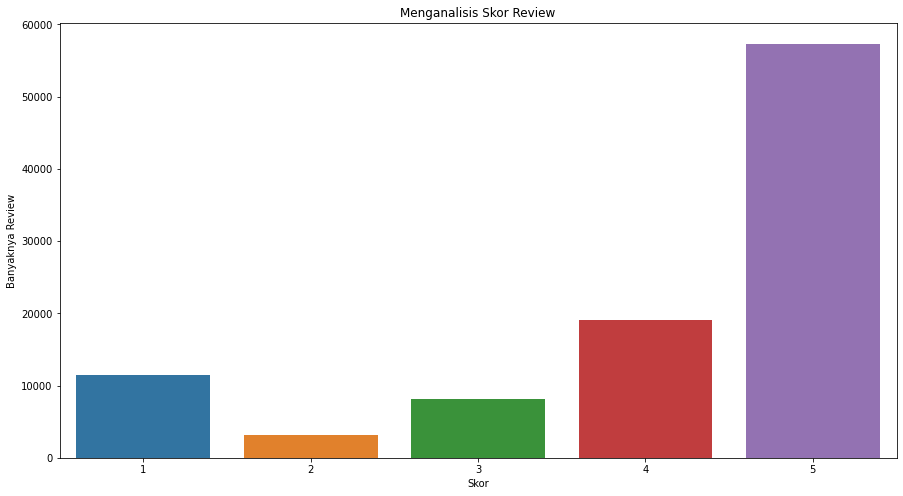

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='review_score', data=reviews)
plt.title('Menganalisis Skor Review')
plt.xlabel('Skor')
plt.ylabel('Banyaknya Review')